## Data and six questions
This week's data, as I wrote above, comes from the OECD's extensive data about broadband (https://www.oecd.org/en/topics/sub-issues/broadband-statistics.html). I decided to focus on broadband penetration rates, which we can download from:

https://www.oecd.org/content/dam/oecd/en/topics/policy-sub-issues/broadband-statistics/data/1-5-fixed-and-mobile-broadband-penetration.xls
This Excel file contains two sheets, one for fixed broadband and one for mobile.

Here are my six tasks and questions. As always, I'll be back tomorrow with my solutions, including a downloadable Jupyter notebook:

- Create two data frames, one with fixed broadband info, and the other with mobile broadband info, taken from the two sheets of the Excel file. Ignore the row with overall OECD information. The country names should be the data frame's columns, and the quarters should be the rows. Combine the two data frames into a single, multi-indexed data frame
- Turn the data frames' indexes (containing the quarters) into datetime values, choosing the final date of the named quarter.
- Get the mean number of fixed broadband users per country, in all of 2023. Which five countries have the greatest number per 100 people? How about mobile broadband? Is there any overlap between these two lists of countries?
- For each country, find the year in which the mobile broadband penetration grew the greatest amount (by percentage), year over year. Plot this as a histogram, to see the number of countries with greatest growth per year.
- Are there any countries with more than 100% mobile penetration in a given quarter?
- Have there been cases of decreases in mobile broadband? List the countries and years where this happened.
I'll be back tomorrow with my complete answers.

In [354]:
import numpy as np
import pandas as pd
import xlrd

dfs = list(
    pd.read_excel(
        'data/1-5-fixed-and-mobile-broadband-penetration.xls',
         skiprows=1, header=2, sheet_name=None
    ).values()
)

for ix in range(2):
    dfs[ix] = (
        dfs[ix].iloc[:39].rename(columns={'Unnamed: 0': 'Date'}).T
        .reset_index()
    )
    dfs[ix].columns = dfs[ix].iloc[0]
    dfs[ix] = dfs[ix].iloc[1:]
    dfs[ix]['Date'] = dfs[ix]['Date'].str.replace(r'(Q\d)-(\d{4})', r'\2-\1', regex=True)
    dfs[ix]['Date'] = dfs[ix].apply(
        (lambda row: pd.Period(row['Date'], freq='Q').end_time), axis=1
    )
    dfs[ix] = dfs[ix].set_index('Date', drop=True)
    for col in dfs[ix].columns:
        dfs[ix][col] = pd.to_numeric(dfs[ix][col], errors='coerce')

In [355]:
bbd_types = ['fixed', 'mobile']
for ix, bbd_type in enumerate(bbd_types):
    annual_mean_df = dfs[ix].resample('YE').mean()
    row2023 = annual_mean_df[annual_mean_df.index.year == 2023]
    date2023 = row2023.index[0]
    vals2023 = row2023.T[date2023]
    sorted2023 = vals2023.sort_values()
    print(f'----{bbd_type}----')
    display(sorted2023.iloc[-5:])

----fixed----


0
Germany        45.425
Norway         46.045
Korea          46.405
Switzerland    46.550
France         46.960
Name: 2023-12-31 00:00:00, dtype: float64

----mobile----


0
Israel           145.900
Finland          160.410
Estonia          183.710
United States    186.560
Japan            201.515
Name: 2023-12-31 00:00:00, dtype: float64

In [356]:
max_growth_per_country_dfs = dict()
for ix, bbd_type in enumerate(bbd_types):
    annual_mean_df = dfs[ix].resample('YE').mean()
    dates = annual_mean_df.pct_change(fill_method=None).idxmax()
    vals = annual_mean_df.pct_change(fill_method=None).max()
    print(f'----{bbd_type}----')
    df = pd.concat([dates, vals], axis=1)
    df = df[np.isfinite(df).all(axis=1)]
    df.columns = ['Date of max growth', 'Max growth']
    df['Year of max growth'] = df['Date of max growth'].dt.year
    display(df)
    max_growth_per_country_dfs[bbd_type] = df
    
    


----fixed----


,Date of max growth,Max growth,Year of max growth
0,,,
Australia,2005-12-31,0.886895,2005
Austria,2005-12-31,0.389725,2005
Belgium,2004-12-31,0.270085,2004
Canada,2005-12-31,0.167695,2005
Chile,2005-12-31,0.500000,2005
Colombia,2011-12-31,0.237615,2011
Costa Rica,2017-12-31,0.152937,2017
Czechia,2004-12-31,2.385417,2004
Denmark,2004-12-31,0.368702,2004


----mobile----


,Date of max growth,Max growth,Year of max growth
0,,,
Australia,2010-12-31,2.959480,2010
Austria,2011-12-31,0.423031,2011
Belgium,2011-12-31,0.947336,2011
Chile,2010-12-31,1.072034,2010
Colombia,2010-12-31,1.303060,2010
Czechia,2011-12-31,6.997730,2011
Denmark,2010-12-31,1.014180,2010
Estonia,2010-12-31,9.443114,2010
Finland,2011-12-31,1.330391,2011


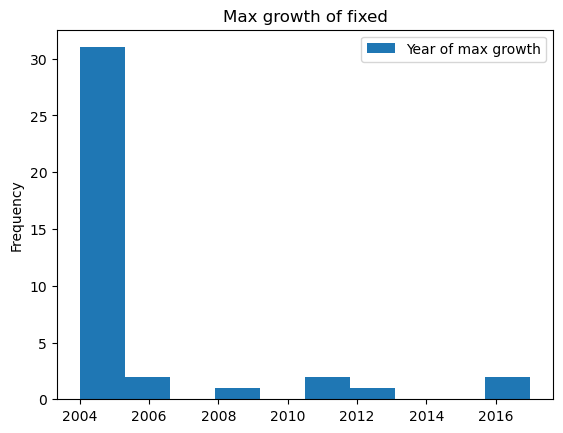

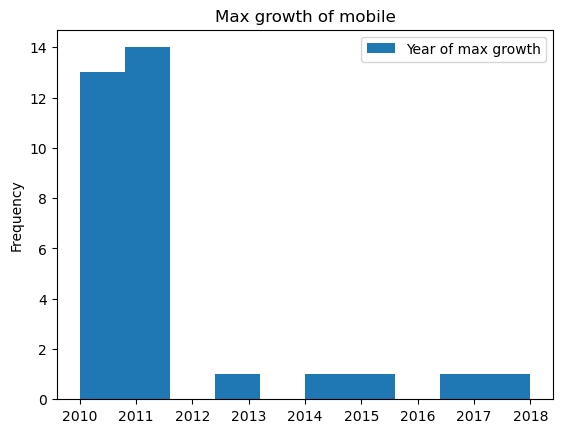

In [357]:
for bbd_type, df in max_growth_per_country_dfs.items():
    (df.loc[:, ['Date of max growth', 'Year of max growth']]
        #.groupby('Year of max growth').count()
        .rename(columns={'Date of max growth': 'Number of countries\nmax growth this year'})
        .plot(kind='hist', title=f'Max growth of {bbd_type}')
     )
    

In [358]:
for ix, bbd_type in enumerate(bbd_types):
    